In [35]:
import pandas as pd
import xml.etree.ElementTree as ET

# Path to your XML file
xml_file = "/content/drive/MyDrive/dsa210/export.xml"
output_csv = "/content/drive/MyDrive/dsa210/output.csv"

# Function to parse XML and extract data into a DataFrame
def parse_xml_to_dataframe(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Namespace used in the XML file (adjust based on your file)
    ns = {'hl7': 'urn:hl7-org:v3'}
    data = []

    # Loop through 'entry' tags and extract information
    for entry in root.findall('.//hl7:entry', ns):
        organizer = entry.find('.//hl7:organizer', ns)
        if organizer is not None:
            component = organizer.find('.//hl7:component', ns)
            if component is not None:
                observation = component.find('.//hl7:observation', ns)
                if observation is not None:
                    code = observation.find('hl7:code', ns)
                    value = observation.find('hl7:value', ns)
                    unit = value.attrib.get('unit') if value is not None else None
                    data.append({
                        "DisplayName": code.attrib.get('displayName') if code is not None else None,
                        "Value": value.attrib.get('value') if value is not None else None,
                        "Unit": unit
                    })
    return pd.DataFrame(data)

# Parse XML and save as CSV
df = parse_xml_to_dataframe(xml_file)
df.to_csv(output_csv, index=False)

print(f"XML data has been saved to {output_csv}")


XML data has been saved to /content/drive/MyDrive/dsa210/output.csv


In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import xml.etree.ElementTree as ET
import pandas as pd



# Function to parse the XML and extract data
def parse_complex_xml_to_dataframe(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    data = []
    for record in root.findall(".//Record"):  # Adjust the tag if necessary
        attributes = record.attrib  # Get all attributes as a dictionary
        data.append({
            "Type": attributes.get("type"),
            "SourceName": attributes.get("sourceName"),
            "SourceVersion": attributes.get("sourceVersion"),
            "Device": attributes.get("device"),
            "Unit": attributes.get("unit"),
            "CreationDate": attributes.get("creationDate"),
            "StartDate": attributes.get("startDate"),
            "EndDate": attributes.get("endDate"),
            "Value": attributes.get("value")
        })

    return pd.DataFrame(data)

# Parse the XML and save to CSV
df = parse_complex_xml_to_dataframe(xml_file)
output_csv = "output_data.csv"
df.to_csv(output_csv, index=False)

print(f"Data has been extracted and saved to {output_csv}")


Data has been extracted and saved to output_data.csv


In [ ]:
df.head()

,Type,SourceName,SourceVersion,Device,Unit,CreationDate,StartDate,EndDate,Value
0,HKQuantityTypeIdentifierHeight,Health,17.0.3,None,cm,2023-11-16 11:05:11 +0300,2023-11-16 11:05:11 +0300,2023-11-16 11:05:11 +0300,170
1,HKQuantityTypeIdentifierBodyMass,Health,17.0.3,None,kg,2023-11-16 11:05:11 +0300,2023-11-16 11:05:11 +0300,2023-11-16 11:05:11 +0300,56
2,HKQuantityTypeIdentifierStepCount,Ayse’s iPhone,15.5,"<<HKDevice: 0x303fa6b20>, name:iPhone, manufac...",count,2022-12-05 17:30:22 +0300,2022-12-05 17:19:20 +0300,2022-12-05 17:23:54 +0300,36
3,HKQuantityTypeIdentifierStepCount,Ayse’s iPhone,15.5,"<<HKDevice: 0x303fa6b20>, name:iPhone, manufac...",count,2022-12-05 17:40:22 +0300,2022-12-05 17:29:19 +0300,2022-12-05 17:30:38 +0300,66
4,HKQuantityTypeIdentifierStepCount,Ayse’s iPhone,15.5,"<<HKDevice: 0x303fa6b20>, name:iPhone, manufac...",count,2022-12-05 19:13:52 +0300,2022-12-05 19:02:20 +0300,2022-12-05 19:02:35 +0300,23


In [37]:
import pandas as pd

# Load the data (assuming you've saved it as a CSV already)
data = pd.read_csv("output_data.csv")

# Filter rows for step count type
step_data = data[data['Type'] == 'HKQuantityTypeIdentifierStepCount']

# Convert StartDate and EndDate to datetime
step_data['StartDate'] = pd.to_datetime(step_data['StartDate'])
step_data['EndDate'] = pd.to_datetime(step_data['EndDate'])

# Extract the date from StartDate for grouping
step_data['Date'] = step_data['StartDate'].dt.date

# Group by Date and sum the step counts
daily_step_count = step_data.groupby('Date')['Value'].sum().reset_index()

# Rename columns for clarity
daily_step_count.columns = ['Date', 'TotalStepCount']

# Save to CSV if needed
daily_step_count.to_csv("daily_step_count.csv", index=False)

# Display the result
print(daily_step_count.tail())


<ipython-input-37-148461dc9494>:4: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("output_data.csv")


           Date TotalStepCount
755  2025-01-04         7608.0
756  2025-01-05         7243.0
757  2025-01-06        10026.0
758  2025-01-07         7432.0
759  2025-01-08          368.0


<ipython-input-37-148461dc9494>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  step_data['StartDate'] = pd.to_datetime(step_data['StartDate'])
<ipython-input-37-148461dc9494>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  step_data['EndDate'] = pd.to_datetime(step_data['EndDate'])
<ipython-input-37-148461dc9494>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [38]:
daily_step_count.head()


,Date,TotalStepCount
0,2022-12-05,2902.0
1,2022-12-06,10980.0
2,2022-12-07,3457.0
3,2022-12-08,6121.0
4,2022-12-09,6302.0


In [39]:
# Load the measurements data
measurements_file = "/content/drive/MyDrive/dsa210/measurements.csv"
measurements_data = pd.read_csv(measurements_file)

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [43]:
# 111Convert 'date' column to datetime if not already done
measurements_data['date'] = pd.to_datetime(measurements_data['date'])

# Filter for rows where 'type' is 'period'
period_data = measurements_data[measurements_data['type'] == 'period']

# Check if period_data is empty
if period_data.empty:
    print("No period data found in the measurements dataset!")
else:
    # Simplify period_data for merging
    period_data = period_data[['date', 'value.option']]
    period_data.rename(columns={'date': 'Date', 'value.option': 'PeriodType'}, inplace=True)

    # 111Ensure 'Date' in daily_step_count is in datetime format
    daily_step_count['Date'] = pd.to_datetime(daily_step_count['Date'])

    # Merge step count data with period data
    merged_data = daily_step_count.merge(period_data, on='Date', how='left')

    # Add a `DuringPeriod` flag
    merged_data['DuringPeriod'] = merged_data['PeriodType'].notna()

    # Count period and non-period days
    period_counts = merged_data['DuringPeriod'].value_counts()
    period_percentage = merged_data['DuringPeriod'].value_counts(normalize=True) * 100

    print("Period Day Counts:")
    print(period_counts)
    print("\nPercentage Breakdown:")
    print(period_percentage)


Period Day Counts:
DuringPeriod
False    619
True     141
Name: count, dtype: int64

Percentage Breakdown:
DuringPeriod
False    81.447368
True     18.552632
Name: proportion, dtype: float64


In [44]:
merged_data.head()


,Date,TotalStepCount,PeriodType,DuringPeriod
0,2022-12-05,2902.0,light,True
1,2022-12-06,10980.0,light,True
2,2022-12-07,3457.0,light,True
3,2022-12-08,6121.0,NaN,False
4,2022-12-09,6302.0,NaN,False


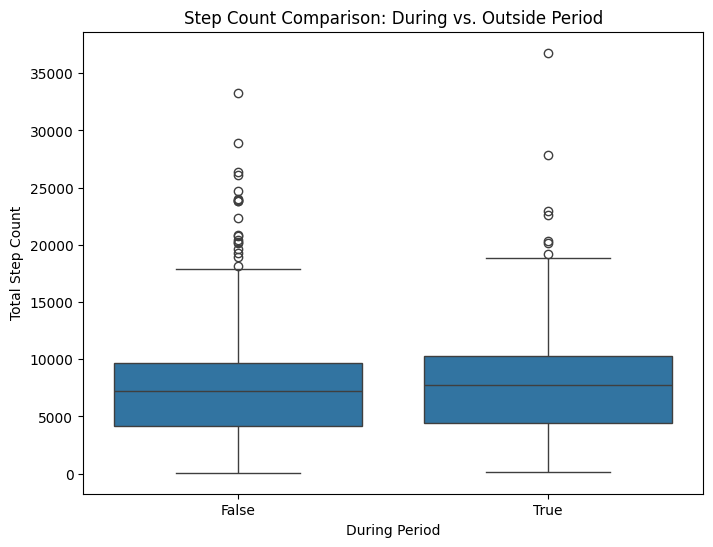

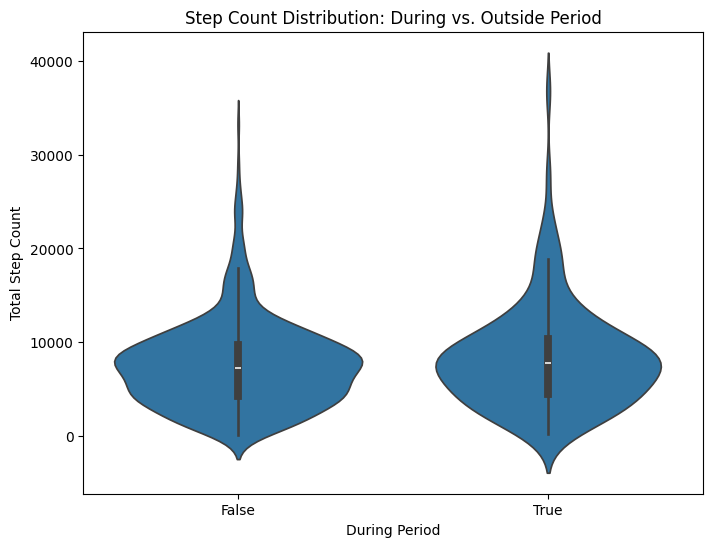

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for step counts
plt.figure(figsize=(8, 6))
sns.boxplot(x='DuringPeriod', y='TotalStepCount', data=merged_data)
plt.title('Step Count Comparison: During vs. Outside Period')
plt.xlabel('During Period')
plt.ylabel('Total Step Count')
plt.show()

# Violin Plot for more detail
plt.figure(figsize=(8, 6))
sns.violinplot(x='DuringPeriod', y='TotalStepCount', data=merged_data)
plt.title('Step Count Distribution: During vs. Outside Period')
plt.xlabel('During Period')
plt.ylabel('Total Step Count')
plt.show()


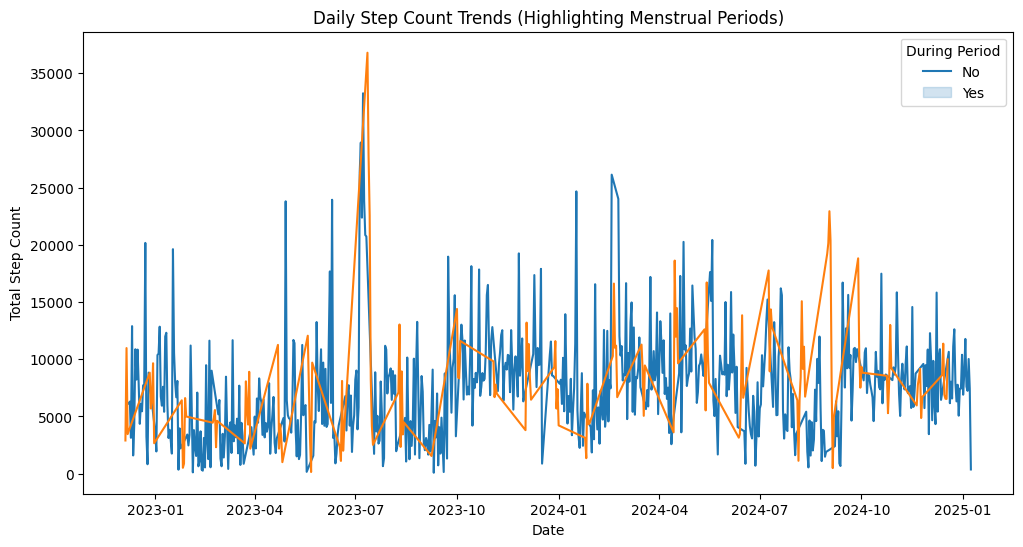

In [46]:
# Time series plot for step counts
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='TotalStepCount', hue='DuringPeriod', data=merged_data)
plt.title('Daily Step Count Trends (Highlighting Menstrual Periods)')
plt.xlabel('Date')
plt.ylabel('Total Step Count')
plt.legend(title='During Period', labels=['No', 'Yes'])
plt.show()


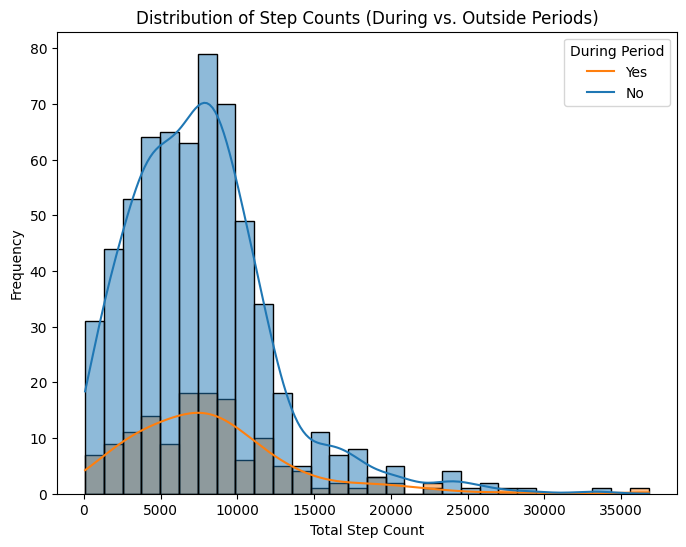

In [47]:
# Distribution plot for step counts
plt.figure(figsize=(8, 6))
sns.histplot(data=merged_data, x='TotalStepCount', hue='DuringPeriod', kde=True, bins=30)
plt.title('Distribution of Step Counts (During vs. Outside Periods)')
plt.xlabel('Total Step Count')
plt.ylabel('Frequency')
plt.legend(title='During Period', labels=['Yes', 'No'])
plt.show()


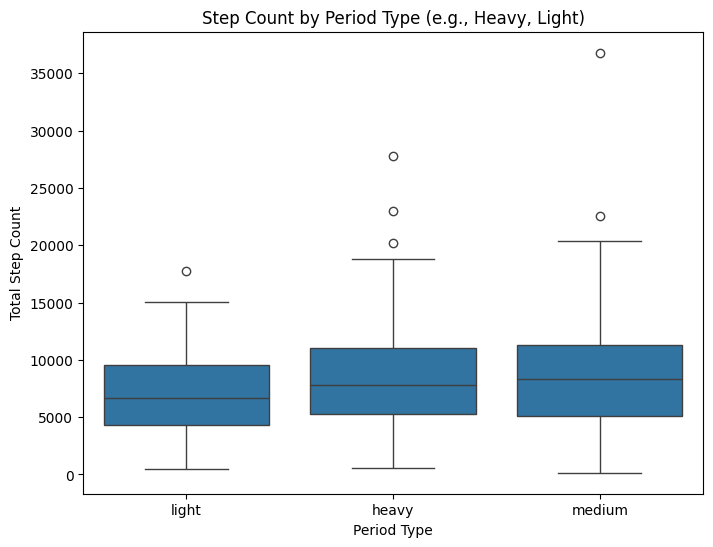

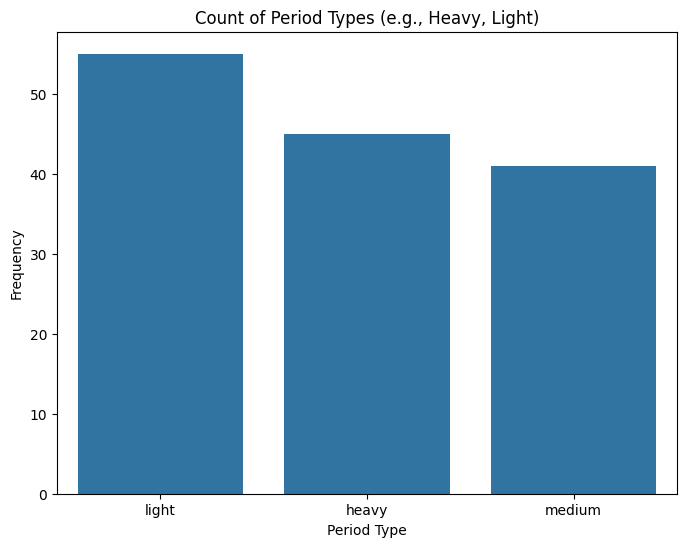

In [48]:
# Filter only period days
period_only_data = merged_data[merged_data['DuringPeriod'] == True]

# Boxplot for step counts by period type
plt.figure(figsize=(8, 6))
sns.boxplot(x='PeriodType', y='TotalStepCount', data=period_only_data)
plt.title('Step Count by Period Type (e.g., Heavy, Light)')
plt.xlabel('Period Type')
plt.ylabel('Total Step Count')
plt.show()

# Countplot for period types
plt.figure(figsize=(8, 6))
sns.countplot(x='PeriodType', data=period_only_data)
plt.title('Count of Period Types (e.g., Heavy, Light)')
plt.xlabel('Period Type')
plt.ylabel('Frequency')
plt.show()


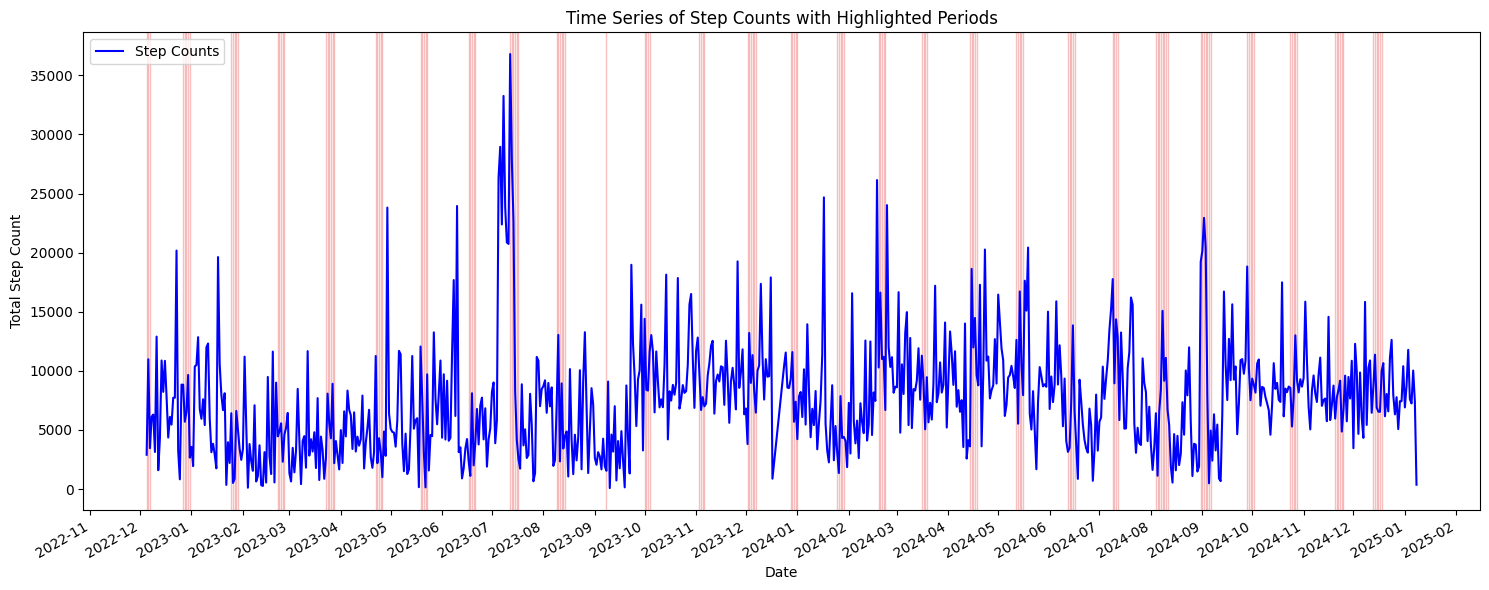

In [49]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert Date to datetime format (if not already)
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Sort data by date to ensure proper plotting
merged_data = merged_data.sort_values(by='Date')

# Create the plot
plt.figure(figsize=(15, 6))

# Plot step counts over time
plt.plot(merged_data['Date'], merged_data['TotalStepCount'], label='Step Counts', color='blue')

# Highlight periods where DuringPeriod is True
for idx, row in merged_data.iterrows():
    if row['DuringPeriod']:
        plt.axvspan(row['Date'], row['Date'], color='lightcoral', alpha=0.5)

# Format the x-axis to show dates nicely
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

# Add labels, legend, and title
plt.xlabel('Date')
plt.ylabel('Total Step Count')
plt.title('Time Series of Step Counts with Highlighted Periods')
plt.legend(['Step Counts'])
plt.tight_layout()

# Show the plot
plt.show()


In [50]:
import scipy.stats as stats
import numpy as np

# Ensure TotalStepCount is numeric
merged_data['TotalStepCount'] = pd.to_numeric(merged_data['TotalStepCount'], errors='coerce')

# Separate period and non-period step counts
period_steps = merged_data[merged_data['DuringPeriod'] == True]['TotalStepCount'].dropna()
non_period_steps = merged_data[merged_data['DuringPeriod'] == False]['TotalStepCount'].dropna()


In [51]:
# Perform Mann-Whitney U Test
u_stat, p_value_u = stats.mannwhitneyu(period_steps, non_period_steps, alternative='less')

print(f"Mann-Whitney U Test Results:")
print(f"U-statistic = {u_stat}, p-value = {p_value_u}")

# Interpretation
if p_value_u < 0.05:
    print("Reject the null hypothesis: Step counts are significantly lower during periods.")
else:
    print("Fail to reject the null hypothesis: No significant difference in step counts.")


Mann-Whitney U Test Results:
U-statistic = 46316.0, p-value = 0.8724121740913369
Fail to reject the null hypothesis: No significant difference in step counts.


In [52]:
# Effect Size (Rank-Biserial Correlation)
n1 = len(period_steps)
n2 = len(non_period_steps)
rank_biserial_corr = (u_stat / (n1 * n2)) - 0.5

print(f"Effect Size (Rank-Biserial Correlation): {rank_biserial_corr}")
# Interpretation
if abs(rank_biserial_corr) > 0.3:
    print("Moderate to strong effect.")
elif abs(rank_biserial_corr) > 0.1:
    print("Weak to moderate effect.")
else:
    print("Minimal effect.")



Effect Size (Rank-Biserial Correlation): 0.030666025046116485
Minimal effect.
